In [566]:
import pandas as pd

In [567]:
df=pd.read_csv('IndianFinancialNews.csv')

In [568]:
df.head()

,Unnamed: 0,Date,Title,Description
0,0,"May 26, 2020, Tuesday","ATMs to become virtual bank branches, accept d...","Close to 14.6 per cent (or 35,000) of the 240,..."
1,1,"May 26, 2020, Tuesday",IDFC First Bank seniors to forgo 65% of bonus ...,"V Vaidyanathan, managing director and chief ex..."
2,2,"May 25, 2020, Monday","Huge scam in YES Bank for many years, says Enf...",Rana Kapoor's wife also charged with abetting ...
3,3,"May 24, 2020, Sunday","Bank of Maharashtra sanctioned Rs 2,789 cr in ...",The bank said it was now gearing up to extend ...
4,4,"May 23, 2020, Saturday",DCB Bank's profit before tax declines 37.6% to...,Net profit for the financial year ended March ...


In [569]:
df.isnull().sum()

Unnamed: 0       0
Date             0
Title            0
Description    710
dtype: int64

In [570]:
df.drop(['Unnamed: 0','Title'],axis=1)

,Date,Description
0,"May 26, 2020, Tuesday","Close to 14.6 per cent (or 35,000) of the 240,..."
1,"May 26, 2020, Tuesday","V Vaidyanathan, managing director and chief ex..."
2,"May 25, 2020, Monday",Rana Kapoor's wife also charged with abetting ...
3,"May 24, 2020, Sunday",The bank said it was now gearing up to extend ...
4,"May 23, 2020, Saturday",Net profit for the financial year ended March ...
...,...,...
49995,"February 11, 2003, Tuesday",Lic Mops Up Government Securities As Prices Crash
49996,"February 11, 2003, Tuesday",Banks Plan To Raise Lending Rates Without Alte...
49997,"February 10, 2003, Monday","Net Scheduled Inflows Of Rs 1,559.9 Crore"
49998,"February 10, 2003, Monday",Rbi Calls Meet To Push Floating Rate Deposits


In [571]:
#df['Date']=pd.to_datetime(df['Date'])

In [572]:
#df=df.set_index(df['Date'])

In [573]:
df.head()

,Unnamed: 0,Date,Title,Description
0,0,"May 26, 2020, Tuesday","ATMs to become virtual bank branches, accept d...","Close to 14.6 per cent (or 35,000) of the 240,..."
1,1,"May 26, 2020, Tuesday",IDFC First Bank seniors to forgo 65% of bonus ...,"V Vaidyanathan, managing director and chief ex..."
2,2,"May 25, 2020, Monday","Huge scam in YES Bank for many years, says Enf...",Rana Kapoor's wife also charged with abetting ...
3,3,"May 24, 2020, Sunday","Bank of Maharashtra sanctioned Rs 2,789 cr in ...",The bank said it was now gearing up to extend ...
4,4,"May 23, 2020, Saturday",DCB Bank's profit before tax declines 37.6% to...,Net profit for the financial year ended March ...


In [574]:
df.drop(['Unnamed: 0','Date','Description'],axis=1)

,Title
0,"ATMs to become virtual bank branches, accept d..."
1,IDFC First Bank seniors to forgo 65% of bonus ...
2,"Huge scam in YES Bank for many years, says Enf..."
3,"Bank of Maharashtra sanctioned Rs 2,789 cr in ..."
4,DCB Bank's profit before tax declines 37.6% to...
...,...
49995,Lic Mops Up Government Securities As Prices Crash
49996,Banks Plan To Raise Lending Rates Without Alte...
49997,"Net Scheduled Inflows Of Rs 1,559.9 Crore"
49998,Rbi Calls Meet To Push Floating Rate Deposits


In [575]:
#df['Date']=pd.to_datetime(df['Date'])

In [576]:
#df=df.set_index(df['Date'])

In [577]:
df=df.drop(['Unnamed: 0','Description'],axis=1)

In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    50000 non-null  object
 1   Title   50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [579]:
df=df.dropna()

In [580]:
import numpy as np

In [581]:
c=[]
a=['dcb','maharashtra','idfc','yes','kotakbank','indusindbk','axisbank','sbin','baroda','canara','overseas','punjab']
for j in range(0,len(df)):
    for i in str(df['Title'].iloc[j]).lower().split():
        if i in a:
            df.replace({df['Title'].iloc[j]:np.nan},inplace=True)
            break

In [582]:
df.isnull().sum()

Date        0
Title    2056
dtype: int64

In [583]:
df.head()

,Date,Title
0,"May 26, 2020, Tuesday","ATMs to become virtual bank branches, accept d..."
1,"May 26, 2020, Tuesday",NaN
2,"May 25, 2020, Monday",NaN
3,"May 24, 2020, Sunday",NaN
4,"May 23, 2020, Saturday",NaN


In [584]:
df=df.dropna()

In [585]:
from textblob import TextBlob

In [586]:
import nltk

In [587]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [588]:
sent= SentimentIntensityAnalyzer()

In [589]:
sent1=TextBlob(df.iloc[0][1])

In [590]:
s=[]
for i in range(0,df.shape[0]):
    score=TextBlob(df.iloc[i][1]).sentiment
    c=score[0]
    s.append(c)
    

In [591]:
df['sentiments']=s

In [592]:
df.head()

,Date,Title,sentiments
0,"May 26, 2020, Tuesday","ATMs to become virtual bank branches, accept d...",0.0000
6,"May 22, 2020, Friday","Retail, MSME loans to get cheaper as RBI cuts ...",0.1000
7,"May 22, 2020, Friday","RBI forecasts economic contraction, announces ...",0.0375
8,"May 22, 2020, Friday","RBI extends loan moratorium till Aug 31, silen...",0.0000
9,"May 22, 2020, Friday","Govt seeks to raise Rs 14,000 cr from second t...",0.0000


In [593]:
new_df=df.groupby(['Date'],as_index=False)['sentiments'].mean()

In [594]:
new_df.shape

(6037, 2)

In [595]:
df=pd.DataFrame(new_df)

In [596]:
df.head()

,Date,sentiments
0,"April 01, 2003, Tuesday",0.035714
1,"April 01, 2004, Thursday",0.000000
2,"April 01, 2005, Friday",-0.077143
3,"April 01, 2006, Saturday",0.137143
4,"April 01, 2007, Sunday",0.000000


In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6037 entries, 0 to 6036
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        6037 non-null   object 
 1   sentiments  6037 non-null   float64
dtypes: float64(1), object(1)
memory usage: 94.5+ KB


In [598]:
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)

In [599]:
df=df.set_index('Date')

In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6037 entries, 2003-04-01 to 2019-09-30
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sentiments  6037 non-null   float64
dtypes: float64(1)
memory usage: 94.3 KB


In [601]:
######

In [602]:
new_df=pd.read_csv('HDFC.csv',infer_datetime_format=True)

In [603]:
new_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN


In [604]:
new_df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,HDFC,EQ,2497.35,2500.00,2534.1,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14,121028.0,2440395.0,0.6232
5302,2021-04-27,HDFC,EQ,2509.80,2494.15,2526.8,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,102250.0,1040749.0,0.5100
5303,2021-04-28,HDFC,EQ,2518.40,2516.10,2609.0,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14,117425.0,1815110.0,0.5327
5304,2021-04-29,HDFC,EQ,2577.00,2590.90,2628.0,2533.00,2539.70,2538.85,2569.65,3005468,7.722995e+14,132826.0,1472924.0,0.4901
5305,2021-04-30,HDFC,EQ,2538.85,2503.10,2525.0,2411.10,2433.25,2420.10,2445.94,6024595,1.473581e+15,224454.0,3839105.0,0.6372


In [605]:
df1=new_df.loc[:,['Date','Close','Volume','Open']]

In [606]:
df1.head()

,Date,Close,Volume,Open
0,2000-01-03,293.50,22744,293.5
1,2000-01-04,304.05,255251,317.0
2,2000-01-05,292.80,269087,290.0
3,2000-01-06,296.45,305916,301.0
4,2000-01-07,286.55,197039,290.0


In [607]:
df1.shape

(5306, 4)

In [608]:
df1['Date']=pd.to_datetime(df1['Date'])

In [609]:
df1=df1.set_index(df1['Date'])

In [610]:
df1=df1.drop(['Date'],axis=1)

In [611]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [612]:
import matplotlib.pyplot as plt

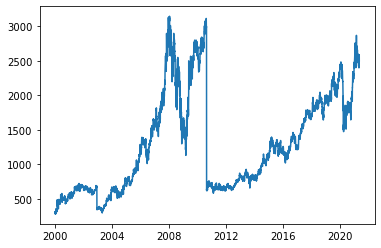

In [613]:
plt.plot(df1['Open'])

In [614]:
df1.head()

,Close,Volume,Open
Date,,,
2000-01-03,293.50,22744,293.5
2000-01-04,304.05,255251,317.0
2000-01-05,292.80,269087,290.0
2000-01-06,296.45,305916,301.0
2000-01-07,286.55,197039,290.0


In [615]:
from sklearn.preprocessing import MinMaxScaler

In [616]:
final_df=pd.concat([df1,df],axis=1)

In [617]:
df

,sentiments
Date,
2003-04-01,0.035714
2004-04-01,0.000000
2005-04-01,-0.077143
2006-04-01,0.137143
2007-04-01,0.000000
...,...
2014-09-30,-0.025000
2015-09-30,-0.480000
2016-09-30,-0.018333


In [618]:
final_df.head()

,Close,Volume,Open,sentiments
Date,,,,
2000-01-03,293.50,22744.0,293.5,NaN
2000-01-04,304.05,255251.0,317.0,NaN
2000-01-05,292.80,269087.0,290.0,NaN
2000-01-06,296.45,305916.0,301.0,NaN
2000-01-07,286.55,197039.0,290.0,NaN


In [619]:
final_df['sentiments'].iloc[0:778].nunique()

1

In [620]:
final_df['sentiments'].iloc[6842::].nunique()

1

In [621]:
final_df=final_df.iloc[776:6844,:]

In [622]:
final_df.head()

,Close,Volume,Open,sentiments
Date,,,,
2003-02-07,376.15,57309.0,372.55,NaN
2003-02-10,390.20,200201.0,375.20,0.00000
2003-02-11,387.50,125146.0,392.00,0.00000
2003-02-12,379.00,31381.0,388.00,0.00625
2003-02-13,NaN,NaN,NaN,0.06000


In [623]:
final_df.tail()

,Close,Volume,Open,sentiments
Date,,,,
2020-05-20,1627.00,6847043.0,1550.0,0.000000
2020-05-21,1597.30,7056092.0,1632.9,-0.008333
2020-05-22,1516.15,12034389.0,1582.0,-0.027083
2020-05-26,1502.15,12752510.0,1516.0,0.000000
2020-05-27,1570.40,12428432.0,1513.0,NaN


In [624]:
final_df.isnull().sum()

Close         1771
Volume        1771
Open          1771
sentiments      31
dtype: int64

In [625]:
final_df['sentiments'].fillna(0.0,inplace=True)

In [626]:
final_df['Close']=final_df['Close'].ffill()

In [627]:
final_df['Volume']=final_df['Volume'].ffill()

In [628]:
final_df['Open']=final_df['Open'].ffill()

In [629]:
final_df.isnull().sum()

Close         0
Volume        0
Open          0
sentiments    0
dtype: int64

### Appling lstm model without sentiments

In [630]:
final_df.head()

,Close,Volume,Open,sentiments
Date,,,,
2003-02-07,376.15,57309.0,372.55,0.00000
2003-02-10,390.20,200201.0,375.20,0.00000
2003-02-11,387.50,125146.0,392.00,0.00000
2003-02-12,379.00,31381.0,388.00,0.00625
2003-02-13,379.00,31381.0,388.00,0.06000


In [631]:
a=final_df.loc[:,['sentiments']]

In [632]:
len(a)

6068

In [633]:
final_df1=final_df.iloc[:,:-1]

In [634]:
import numpy as np
import math

In [635]:
import tensorflow as tf

In [636]:
import keras

In [637]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten

In [638]:
from sklearn.preprocessing import StandardScaler

In [639]:
std_df=StandardScaler()


In [640]:
std_df1=std_df.fit(final_df1)

In [641]:
std_df2=std_df.transform(final_df1)

In [642]:
df3=pd.DataFrame(std_df2)

In [643]:
a=list(final_df1.columns)

In [644]:
df3.columns=a

In [645]:
df3.head(21)

,Close,Volume,Open
0,-1.470140,-0.494962,-1.476048
1,-1.449493,-0.460630,-1.472153
2,-1.453461,-0.478663,-1.447459
3,-1.465952,-0.501191,-1.453338
4,-1.465952,-0.501191,-1.453338
5,-1.471756,-0.484776,-1.472447
6,-1.471756,-0.484776,-1.472447
7,-1.469185,-0.492452,-1.461423
8,-1.471683,-0.494208,-1.471344
9,-1.472124,-0.480553,-1.472447


In [646]:
train_df_size=len(df3)*0.8

In [647]:
test_df_size=len(df3)-train_df_size

In [648]:
train_df_size

4854.400000000001

In [649]:
test_df_size

1213.5999999999995

In [650]:
train_df=df3.iloc[0:4854,::]

In [651]:
test_df=df3.iloc[4854 : ,::]

In [652]:
x_train=[]
y_train=[]

In [653]:
no_d_future=1
no_d_past=20

In [654]:
for i  in range(no_d_past,len(train_df)-no_d_future+1):
    x_train.append(train_df.iloc[i-no_d_past:i,0:3])
    y_train.append(train_df.iloc[i+no_d_future-1:i+no_d_future,[2]])

In [655]:
x_train=np.array(x_train)

In [656]:
x_train[0]

array([[-1.4701398 , -0.4949615 , -1.47604806],
       [-1.44949334, -0.46063002, -1.47215285],
       [-1.45346099, -0.47866287, -1.44745872],
       [-1.46595173, -0.50119101, -1.45333827],
       [-1.46595173, -0.50119101, -1.45333827],
       [-1.47175625, -0.48477561, -1.47244683],
       [-1.47175625, -0.48477561, -1.47244683],
       [-1.46918463, -0.49245173, -1.46142266],
       [-1.47168277, -0.49420828, -1.47134442],
       [-1.47212362, -0.48055301, -1.47244683],
       [-1.4710215 , -0.47479105, -1.4636275 ],
       [-1.4704337 , -0.47142089, -1.47244683],
       [-1.4704337 , -0.47142089, -1.47244683],
       [-1.4710215 , -0.45262954, -1.46950705],
       [-1.47175625, -0.45289142, -1.47244683],
       [-1.47168277, -0.45935375, -1.46950705],
       [-1.47227057, -0.46319914, -1.47105044],
       [-1.47212362, -0.44605622, -1.46818415],
       [-1.47212362, -0.49979701, -1.47244683],
       [-1.47469525, -0.48464202, -1.47244683]])

In [657]:
y_train[0]

,Open
20,-1.484941


In [658]:
y_train=np.array(y_train)

In [659]:
model=Sequential()

In [660]:
model.add(LSTM(64,activation='relu',input_shape=(20,3),return_sequences=True))
model.add(LSTM(32,activation='relu',return_sequences=False))
#model.add(LSTM(16,activation='relu',return_sequences=False))
#model.add(Dense(20),activation='relu')
model.add(Dense(1))

          

In [661]:
model.compile(optimizer='adam',loss='mse')

In [662]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 20, 64)            17408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [663]:
model.fit(x_train,y_train,batch_size=32, epochs=10,validation_split=0.2)

Epoch 1/10
121/121 [==============================] - 7s 24ms/step - loss: 0.1122 - val_loss: 0.0032
Epoch 2/10
121/121 [==============================] - 2s 20ms/step - loss: 0.0151 - val_loss: 0.0018
Epoch 3/10
121/121 [==============================] - 2s 19ms/step - loss: 0.0104 - val_loss: 0.0020
Epoch 4/10
121/121 [==============================] - 2s 20ms/step - loss: 0.0093 - val_loss: 0.0015
Epoch 5/10
121/121 [==============================] - 2s 19ms/step - loss: 0.0087 - val_loss: 0.0017
Epoch 6/10
121/121 [==============================] - 2s 20ms/step - loss: 0.0080 - val_loss: 0.0012
Epoch 7/10
121/121 [==============================] - 2s 20ms/step - loss: 0.0080 - val_loss: 0.0014
Epoch 8/10
121/121 [==============================] - 2s 20ms/step - loss: 0.0072 - val_loss: 0.0020
Epoch 9/10
121/121 [==============================] - 3s 21ms/step - loss: 0.0069 - val_loss: 0.0012
Epoch 10/10
121/121 [==============================] - 3s 21ms/step - loss: 0.0068 - val_lo

In [664]:
x_test=[]
y_test=[]

In [665]:
for i in range(no_d_past,len(test_df)-no_d_future+1):
    x_test.append(test_df.iloc[i-no_d_past:i,0:3])
    y_test.append(test_df.iloc[i+no_d_future-1:i+no_d_future,2])

In [666]:
pred_values=model.predict(np.array(x_test))

38/38 [==============================] - 1s 8ms/step


In [667]:
actual_values=list(np.array(y_test))

In [668]:
df=pd.DataFrame()

In [669]:
df['actual']=list(np.array(y_test))

In [670]:
df['predicted_values']=pred_values

In [671]:
pred_values

array([[-0.1905912 ],
       [-0.2053616 ],
       [-0.21814333],
       ...,
       [ 0.36083367],
       [ 0.32616082],
       [ 0.28594607]], dtype=float32)

In [672]:
import numpy as np

In [673]:
actual_rmse=np.sqrt(np.mean(np.square(df['actual'])))
actual_rmse

array([0.82042868])

In [674]:
pred_rmse=np.sqrt(np.mean(np.square(pred_values)))

In [675]:
pred_rmse

0.86598366

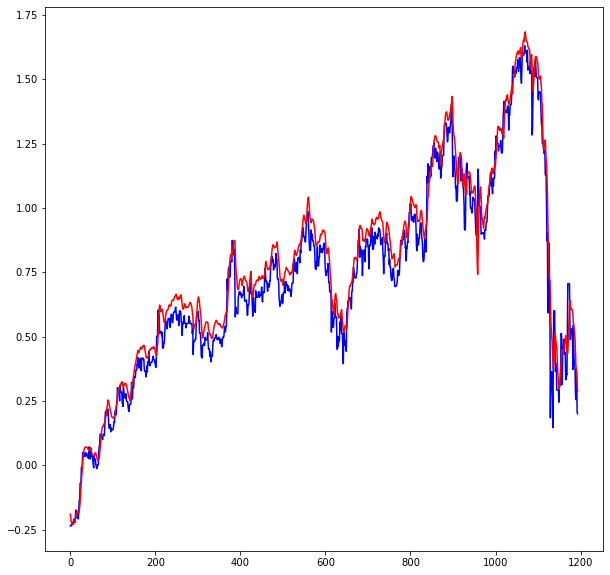

In [676]:
plt.figure(figsize=(10,10))
plt.plot(df['actual'],color='blue',label='actual_values')
plt.plot(df['predicted_values'],color='red',label='predicted_values')


In [677]:
n_day_for_pre=30

In [678]:
forcast_dates=pd.date_range(start='2020-05-27',periods=n_day_for_pre,freq='1d')

In [679]:
focast=list(forcast_dates)

In [680]:
forcast = model.predict(np.array(x_test)[-30:])

1/1 [==============================] - 0s 139ms/step


In [681]:
values=list(forcast)

In [682]:
values=np.repeat(values,3,axis=-1)

In [683]:
actual_values=std_df.inverse_transform(values)

In [684]:
forcast_df=pd.DataFrame()

In [685]:
forcast_df['dates']=pd.Series(forcast_dates)

In [686]:
forcast_df['values']=actual_values[:,[0]]

In [687]:
forcast_df['dates']=pd.to_datetime(forcast_df['dates'])

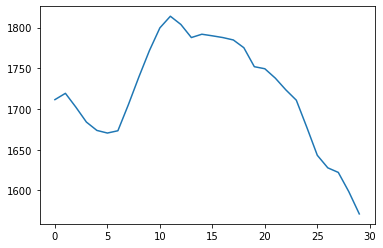

In [688]:

plt.plot(forcast_df['values'])

### using Sentiment scores

In [689]:
final_df1=final_df.iloc[:,:]

In [690]:
from sklearn.preprocessing import StandardScaler

In [691]:
scaler=StandardScaler()

In [692]:
scaled_df=scaler.fit_transform(final_df1)

In [693]:
df3=pd.DataFrame(scaled_df)

In [694]:
a=list(final_df1.columns)

In [695]:
df3.columns=a

In [696]:
train_df=df3.iloc[0:4854,::]

In [697]:
test_df=df3.iloc[4854 : ,::]

In [698]:
x_train=[]
y_train=[]

In [699]:
no_d_future=1
no_d_past=20

In [700]:
for i  in range(no_d_past,len(train_df)-no_d_future+1):
    x_train.append(train_df.iloc[i-no_d_past:i,0:4])
    y_train.append(train_df.iloc[i+no_d_future-1:i+no_d_future,[2]])

In [701]:
x_train=np.array(x_train)
y_train=np.array(y_train)


In [702]:
model=Sequential()

In [703]:
model.add(LSTM(64,activation='relu',input_shape=(20,4),return_sequences=True))
model.add(LSTM(32,activation='relu',return_sequences=False))
#model.add(LSTM(16,activation='relu',return_sequences=False))
#model.add(Dense(20),activation='relu')
model.add(Dense(1))


In [704]:
model.compile(optimizer='adam',loss='mse')

In [705]:
model.fit(x_train,y_train,batch_size=32, epochs=10,validation_split=0.2)

Epoch 1/10
121/121 [==============================] - 8s 24ms/step - loss: 0.1444 - val_loss: 0.0086
Epoch 2/10
121/121 [==============================] - 2s 19ms/step - loss: 0.0166 - val_loss: 0.0048
Epoch 3/10
121/121 [==============================] - 2s 19ms/step - loss: 0.0126 - val_loss: 0.0028
Epoch 4/10
121/121 [==============================] - 2s 20ms/step - loss: 0.0100 - val_loss: 0.0020
Epoch 5/10
121/121 [==============================] - 2s 19ms/step - loss: 0.0105 - val_loss: 0.0018
Epoch 6/10
121/121 [==============================] - 2s 19ms/step - loss: 0.0095 - val_loss: 0.0030
Epoch 7/10
121/121 [==============================] - 2s 19ms/step - loss: 0.0085 - val_loss: 0.0015
Epoch 8/10
121/121 [==============================] - 2s 20ms/step - loss: 0.0081 - val_loss: 0.0017
Epoch 9/10
121/121 [==============================] - 2s 21ms/step - loss: 0.0079 - val_loss: 0.0014
Epoch 10/10
121/121 [==============================] - 2s 19ms/step - loss: 0.0066 - val_lo

In [706]:
x_test=[]
y_test=[]

In [707]:
for i  in range(no_d_past,len(test_df)-no_d_future+1):
    x_test.append(test_df.iloc[i-no_d_past:i,0:4])
    y_test.append(test_df.iloc[i+no_d_future-1:i+no_d_future,2])

In [708]:
pred_values_with_S=model.predict(np.array(x_test))

38/38 [==============================] - 1s 8ms/step


In [709]:
actual_values=list(np.array(y_test))

In [710]:
df['pred_values_with_S']=pred_values_with_S

In [711]:
df

,actual,predicted_values,pred_values_with_S
0,[-0.23656406945191613],-0.190591,-0.201490
1,[-0.23671105836280112],-0.205362,-0.219102
2,[-0.2318604243035914],-0.218143,-0.222432
3,[-0.2318604243035914],-0.225076,-0.222844
4,[-0.2318604243035914],-0.229344,-0.241359
...,...,...,...
1189,[0.2546728707262385],0.391742,0.303174
1190,[0.3765266778500238],0.369082,0.300593
1191,[0.3017093222094849],0.360834,0.305033
1192,[0.2046966410252892],0.326161,0.267926


In [712]:
actual_rmse=np.sqrt(np.mean(np.square(df['actual'])))
actual_rmse

array([0.82042868])

In [713]:
rmse_pred_values_with_S=np.sqrt(np.mean(np.square(pred_values_with_S)))

In [714]:
rmse_pred_values_with_S

0.80948037

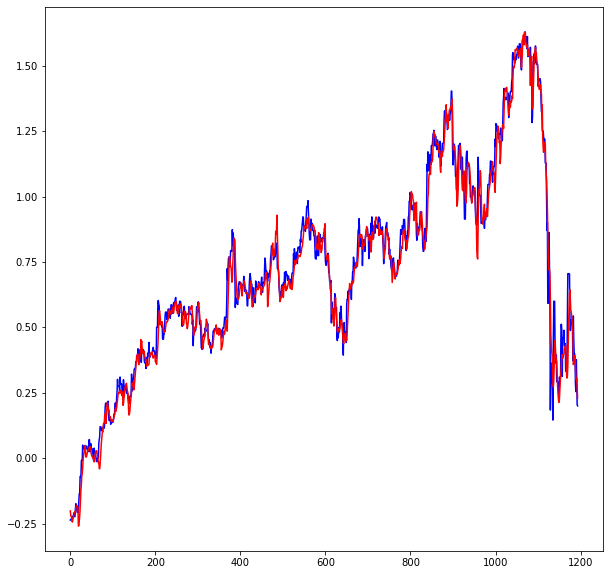

In [715]:
plt.figure(figsize=(10,10))
plt.plot(df['actual'],color='blue',label='actual_values')
plt.plot(df['pred_values_with_S'],label='pred_values_with_S',color='red')